Import necessary libraries

In [4]:
#StandardScaler standardizes features by removing the mean and scaling to unit variance
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
from scipy.stats import zscore



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
df.shape: (30000, 38)

Original DataFrame:
   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  LG  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...   0     0       0               0   
1                       0         0  ...   0     1       0               0   
2                       0         0  ...   0     0       0               0   
3                       0         0  ...   0     0       0               0   
4                       0    

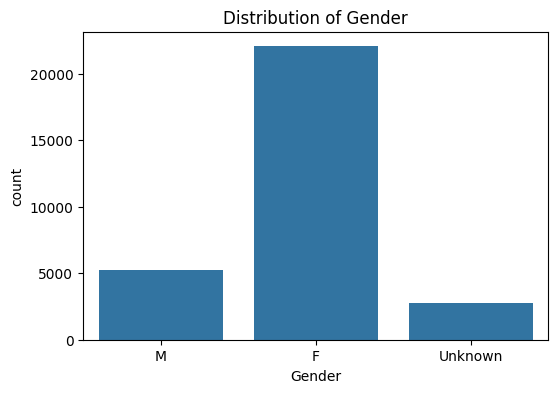

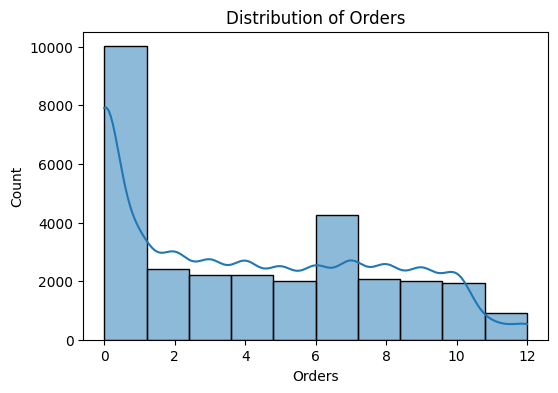

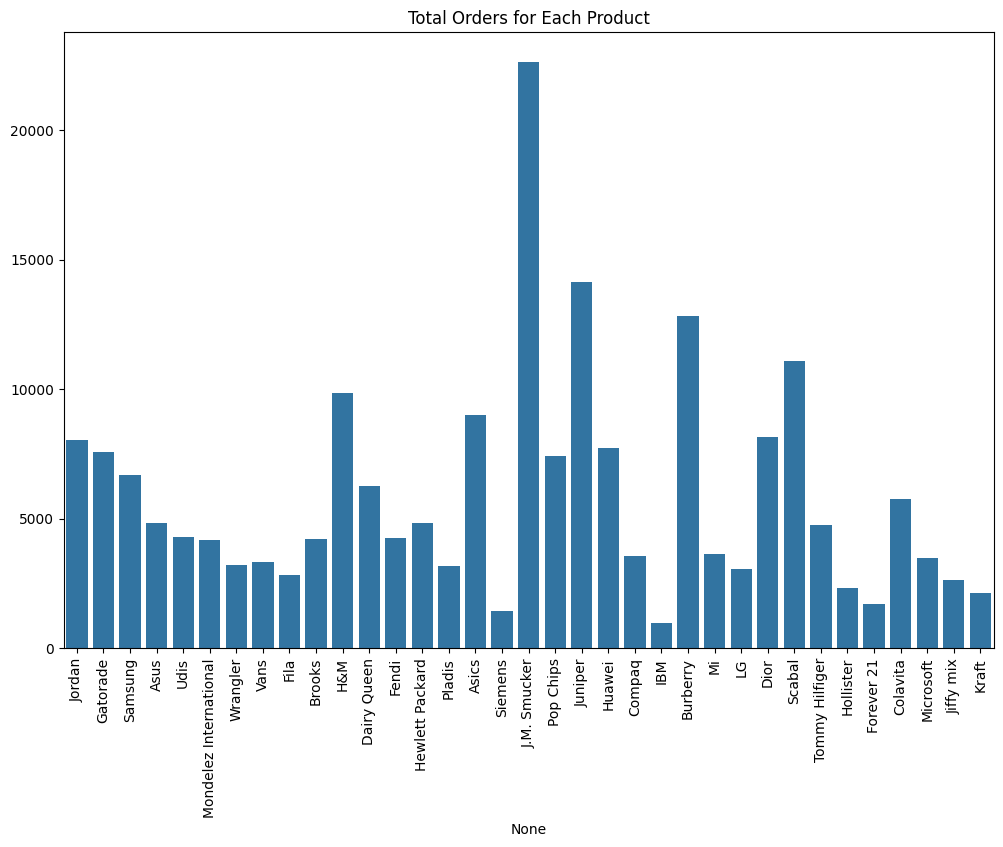

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function 1: Load Data
def load_data():
    file_path = '/content/drive/MyDrive/zidio/ecom customer_data.xlsx'  # Adjust path as needed
    df = pd.read_excel(file_path)
    print("df.shape:", df.shape)
    return df

# Function 2: Clean Data
def clean_data(df):
    print("\nOriginal DataFrame:")
    print(df.head())
    print("\nDuplicated rows:")
    print(df.duplicated().sum())

    # Convert 'Cust_ID' to string
    df['Cust_ID'] = df['Cust_ID'].astype(str)

    # Handle 'Gender' column: Replace 'NA' with None, then uppercase
    df['Gender'] = df['Gender'].replace('NA', None).str.upper()

    # Convert 'Orders' to integer
    df['Orders'] = df['Orders'].astype(int)

    # Convert all product columns to integers
    product_columns = df.columns[3:]  # Assuming product columns start from the fourth column
    df[product_columns] = df[product_columns].astype(int)

    return df

# Function 3: Handle Missing Values
def handle_missing_values(df):
    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Fill missing 'Gender' values with 'Unknown'
    df['Gender'].fillna('Unknown', inplace=True)

    print("\nMissing values in each column after imputing:")
    print(df.isnull().sum())

    return df

# Function 4: Perform EDA
def perform_eda(df):
    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe(include='all'))

    # Display the first few rows of the dataset
    print("\nFirst few rows of the dataset:")
    print(df.head())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Visualize the distribution of 'Gender'
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Gender', data=df)
    plt.title('Distribution of Gender')
    plt.show()

    # Visualize the distribution of 'Orders'
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Orders'], kde=True, bins=10)
    plt.title('Distribution of Orders')
    plt.show()

    # Visualize the total orders for each product
    product_columns = df.columns[3:]  # Assuming product columns start from the fourth column
    product_sums = df[product_columns].sum()
    product_sums = product_sums[product_sums > 0]  # Only plot products with non-zero sums

    plt.figure(figsize=(12, 8))
    sns.barplot(x=product_sums.index, y=product_sums.values)
    plt.xticks(rotation=90)
    plt.title('Total Orders for Each Product')
    plt.show()


    # Pairplot to see relationships between numerical variables
    plt.figure(figsize=(12, 8))
    sns.pairplot(df[['Orders'] + product_columns.tolist()])
    plt.show()

# Master Function to Process Data
def process_data():
    df = load_data()
    df = clean_data(df)
    df = handle_missing_values(df)
    perform_eda(df)
    return df

# Execute the process
df_processed = process_data()
